In [23]:
import pandas as pd

In [24]:
transaction_csv = pd.read_csv(r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\Retail_Data_Transactions.csv")

In [25]:
transaction_csv

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [26]:
response_csv = pd.read_csv(r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\Retail_Data_Response.csv")

In [27]:
response_csv

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [28]:
df = transaction_csv.merge(response_csv , on ='customer_id' , how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [29]:
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [30]:
df.shape

(125000, 4)

In [31]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [32]:
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [33]:
df = df.dropna()

In [34]:
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')


C:\Users\janha\AppData\Local\Temp\ipykernel_27128\2770020963.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\janha\AppData\Local\Temp\ipykernel_27128\2770020963.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\janha\AppData\Local\Temp\ipykernel_27128\2770020963.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [36]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [37]:
from scipy import stats
import numpy as np
z_scores= np.abs(stats.zscore(df['response']))
threshold= 3
outliers= z_scores>threshold
print(df[outliers])

ModuleNotFoundError: No module named 'scipy'

In [ ]:
import pandas as pd
import plotly.express as px
fig = px.box(df, x='tran_amount', title='Transaction Amount Distribution',
             labels={'tran_amount': 'Transaction Amount'},
             hover_data={'tran_amount': True})
fig.show()
fig.write_html('transaction_plot.html')


In [ ]:
df['month']= df['trans_date'].dt.month

C:\Users\janha\AppData\Local\Temp\ipykernel_6212\3457190984.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [ ]:
month_sales = df.groupby('month')['tran_amount'].sum()
month_sales = month_sales.sort_values(ascending=False).reset_index().head(3)
month_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [ ]:
import pandas as pd
import plotly.express as px
#option-1
month = df.groupby('month')['tran_amount'].sum()
month = month.sort_values(ascending=False).reset_index().head(3)
#option-2(using graphs)
month_sales = df.groupby('month')['tran_amount'].sum()
top_month_sales = month_sales.sort_values(ascending=False).reset_index().head(3)
fig = px.bar(top_month_sales, x='month', y='tran_amount',
             title='Top 3 Months with Highest Transaction Amounts',
             labels={'month': 'Month', 'tran_amount': 'Transaction Amount'},
             text='tran_amount')
fig.show()
month
fig.write_html('to_3_month_plot.html')


KeyError: 'month'

In [ ]:
cust_count = df['customer_id'].value_counts().reset_index()
cust_count.columns=['customer_id','count']
top_5 = cust_count.sort_values(by='count' , ascending=False).head(5)
top_5

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


In [ ]:
top_order_sales =cust_count.sort_values(by='count').tail(5)
fig = px.bar(top_order_sales, x='count', y='customer_id',
             title='Top 5 Customers with Highest number of orders',
             labels={'count': 'Number_Of_Orders', 'customer_id': 'Customer_ID'},
             text='count')
fig.show()
fig.write_html('top_5_order_plot.html')

In [ ]:
import pandas as pd
import plotly.graph_objects as go
df['month_year'] = df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=monthly_sales.index, 
    y=monthly_sales.values,
    mode='lines+markers',
    name='Sales'
))
fig.update_layout(
    title='Monthly Sales',
    xaxis_title='Month-Year',
    yaxis_title='Sales',
    xaxis=dict(
        tickformat='%Y-%m',
        dtick='M6',
        tickangle=45
    ),
    template='plotly_white'
)
fig.show()
fig.write_html('monthly_plot.html')


C:\Users\janha\AppData\Local\Temp\ipykernel_27128\1876727592.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
recency = df.groupby('customer_id')['trans_date'].max()
frequency = df.groupby('customer_id')['trans_date'].count()
monetary = df.groupby('customer_id')['tran_amount'].sum()
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})

In [38]:
import pandas as pd
import plotly.express as px
churn_counts = df['response'].value_counts().reset_index()
churn_counts.columns = ['response', 'count']
fig = px.bar(churn_counts, x='response', y='count', 
             title='Count of Churned and Active Customers', 
             labels={'response': 'Customer Status', 'count': 'Number of Customers'},
             text='count')
fig.update_layout(template='plotly_white')
fig.show()
fig.write_html('churned_plot.html')


In [ ]:
def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] <= 15) and (500 < row['monetary'] <= 1000):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


C:\Users\janha\AppData\Local\Temp\ipykernel_6212\1898880138.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



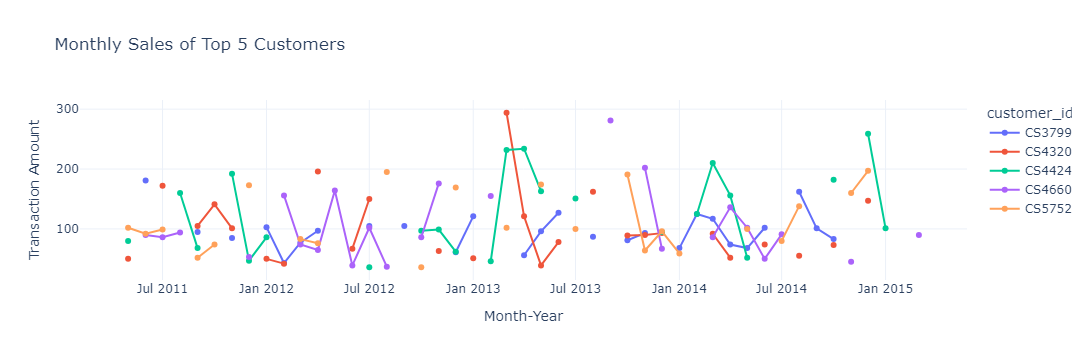

In [ ]:
import pandas as pd
import plotly.express as px
df['month_year'] = df['trans_date'].dt.to_period('M')
monetary = df.groupby('customer_id')['tran_amount'].sum()
top_5_customers = monetary.sort_values(ascending=False).head(5).index
top_customers_df = df[df['customer_id'].isin(top_5_customers)]
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.index = top_customers_sales.index.to_timestamp()
fig = px.line(top_customers_sales, x=top_customers_sales.index, y=top_customers_sales.columns,
              title='Monthly Sales of Top 5 Customers',
              labels={'value': 'Transaction Amount', 'month_year': 'Month-Year'},
              markers=True)
fig.update_layout(template='plotly_white', xaxis_title='Month-Year', yaxis_title='Transaction Amount')
fig.show()
fig.write_html('top_5_cust_plot.html')




In [ ]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [ ]:
df.to_csv('ProjectDS.csv', sep=',')


In [ ]:
rfm.to_csv('Analysis.csv')

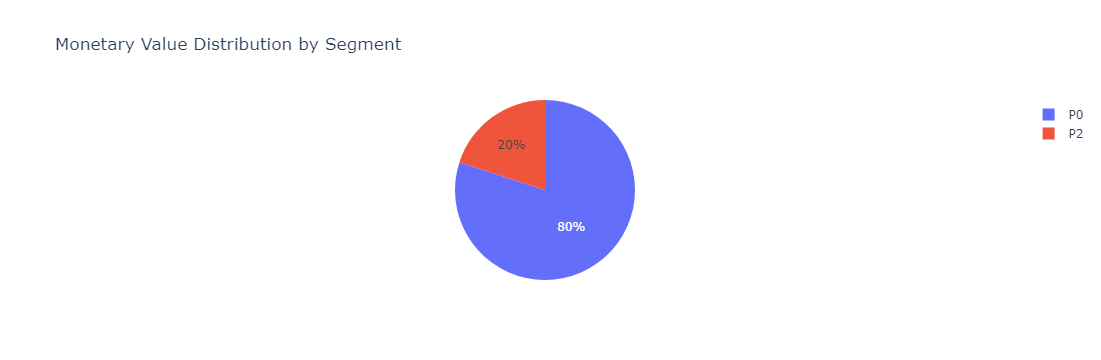

In [ ]:
segment_distribution = rfm.groupby('Segment')['monetary'].sum().reset_index()
fig = px.pie(segment_distribution, names='Segment', values='monetary', 
             title='Monetary Value Distribution by Segment')
fig.show()
fig.write_html('pie_plot.html')


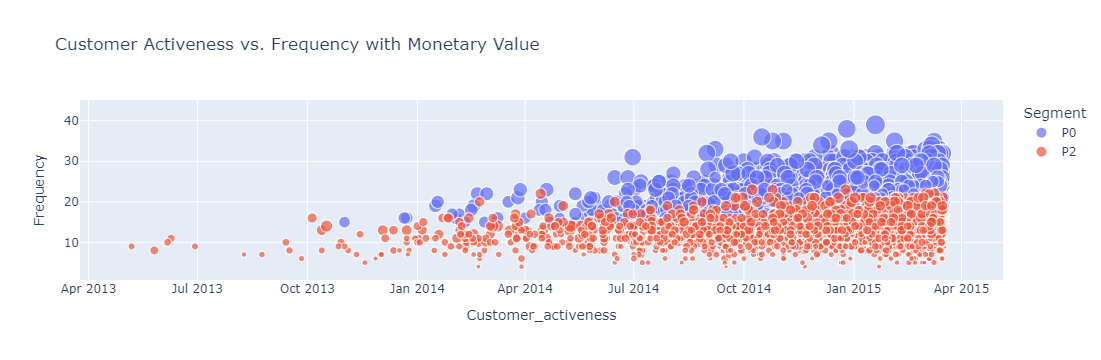

In [ ]:
fig = px.scatter(rfm, x='recency', y='frequency', size='monetary', color='Segment', 
                 title='Customer Activeness vs. Frequency with Monetary Value',
                 labels={'recency': 'Customer_activeness', 'frequency': 'Frequency', 'monetary': 'Monetary'})
fig.show()
fig.write_html('scatter_plot.html')

